# Model Evaluation and Refinement

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#ref1">Model Evaluation </a></li>
    <li><a href="https://#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="https://#ref3">Ridge Regression </a></li>
    <li><a href="https://#ref4">Grid Search</a></li>
</ol>
</div>
<hr>

<h4>Setup</h4>


Install the required libraries

In [ ]:
! pip install pandas
! pip install matplotlib
! pip install scipy
! pip install seaborn
! pip install scikit-learn

Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the data and store it in dataframe `df`:

In [3]:
filename="clean_AutoMobile.csv"
df = pd.read_csv(filename, index_col=0)

First, let's only use numeric data:


In [4]:
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


Libraries for plotting:


In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for Plotting</h2>


In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">1. Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [8]:
y_data = df['price']

Drop price data in dataframe **x_data**:


In [9]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>.


In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing.

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [12]:
from sklearn.linear_model import LinearRegression

We create a Linear Regression object:


In [13]:
lre=LinearRegression()

We fit the model using the feature "horsepower":


In [14]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [15]:
lre.score(x_test[['horsepower']], y_test)

0.3635480624962413

We can see the R^2 is much smaller using the test data compared to the training data.


In [16]:
lre.score(x_train[['horsepower']], y_train)

0.662028747521533

Find the R^2  on the test data using 40% of the dataset for testing.

In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139737368233015

<h2>Cross-Validation Score</h2>


Let's import <b>model_selection</b> from the module <b>cross_val_score</b>.


In [18]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [19]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [20]:
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

We can calculate the average and standard deviation of our estimate:


In [21]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220592359225414 and the standard deviation is 0.29130480666118436


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.


In [22]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976653])

 Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature

In [23]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.516835099979672

You can also use the function 'cross_val_predict' to predict the output.

In [24]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [25]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

<h2 id="ref2">2. Overfitting, Underfitting and Model Selection</h2>

Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [26]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [27]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

Prediction using test data:


In [28]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

Let's perform some model evaluation using our training and testing data separately.

In [29]:
%matplotlib inline

Let's examine the distribution of the predicted values of the training data.


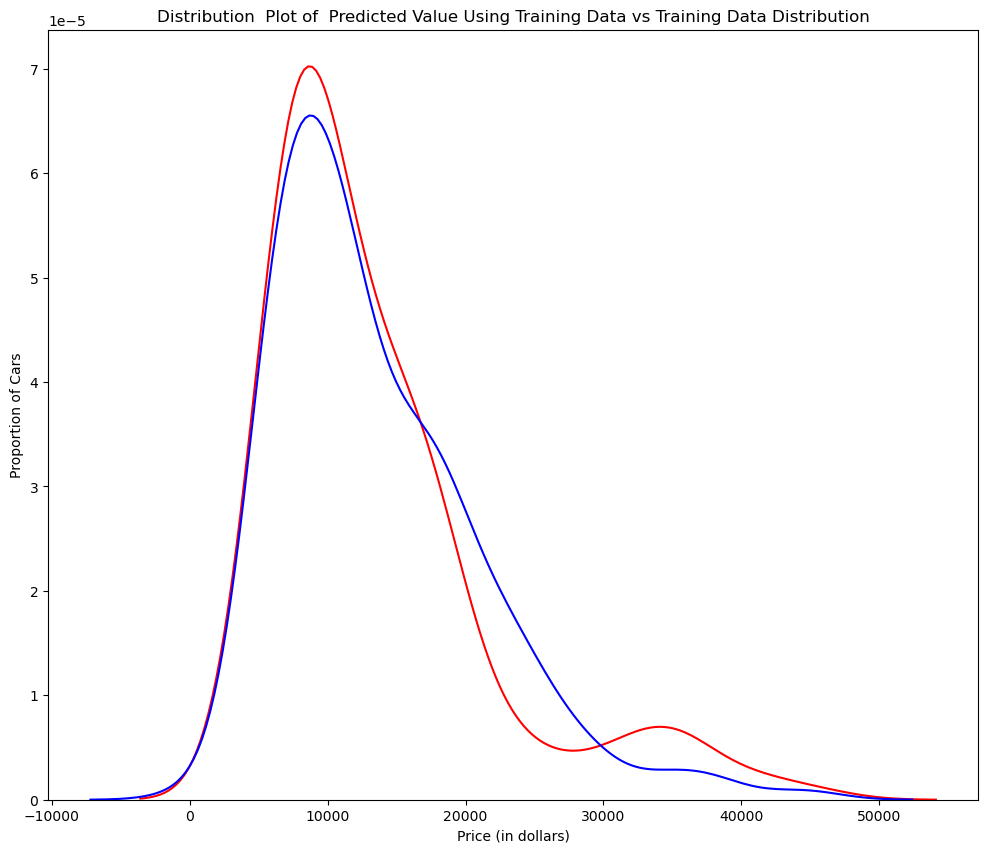

In [30]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


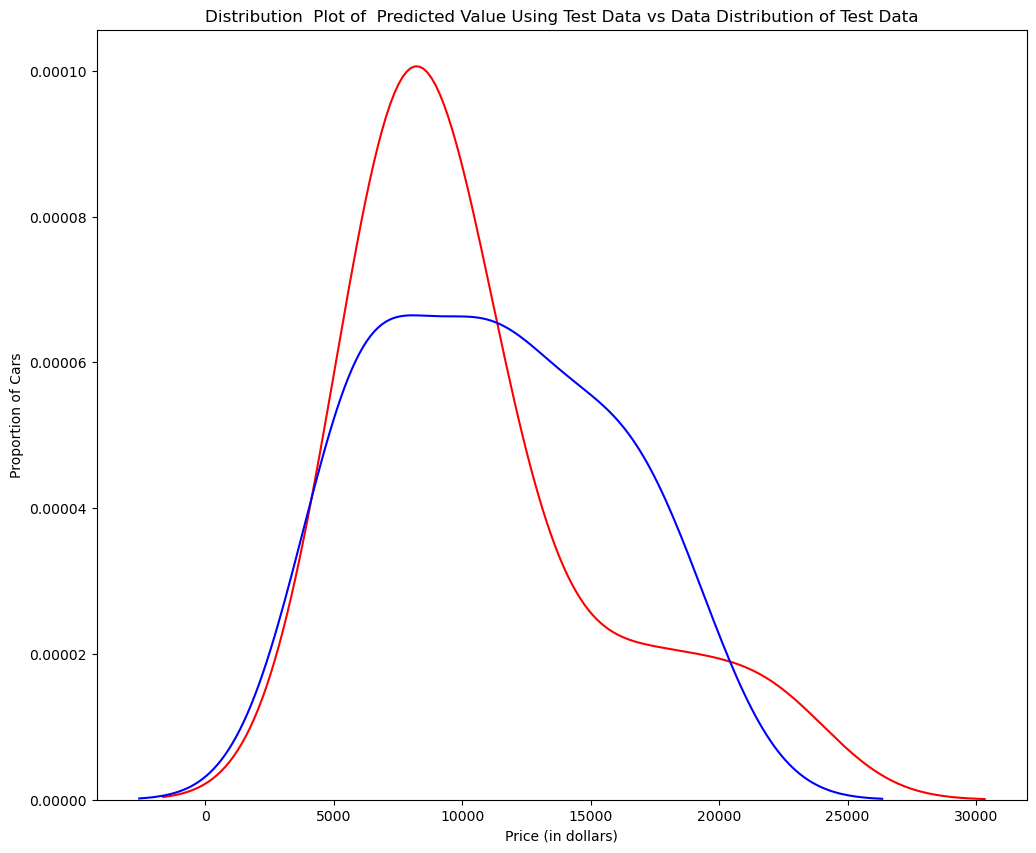

In [31]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [32]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Let's create a degree 5 polynomial model.</p>

Let's use 55 percent of the data for training and the rest for testing:


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>.


In [34]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [35]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [36]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6727.5684937 ,  7306.69841686, 12213.71328834, 18895.0377327 ,
       19996.83929633])

Let's take the first five predicted values and compare it to the actual targets.


In [37]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6727.5684937   7306.69841686 12213.71328834 18895.0377327 ]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


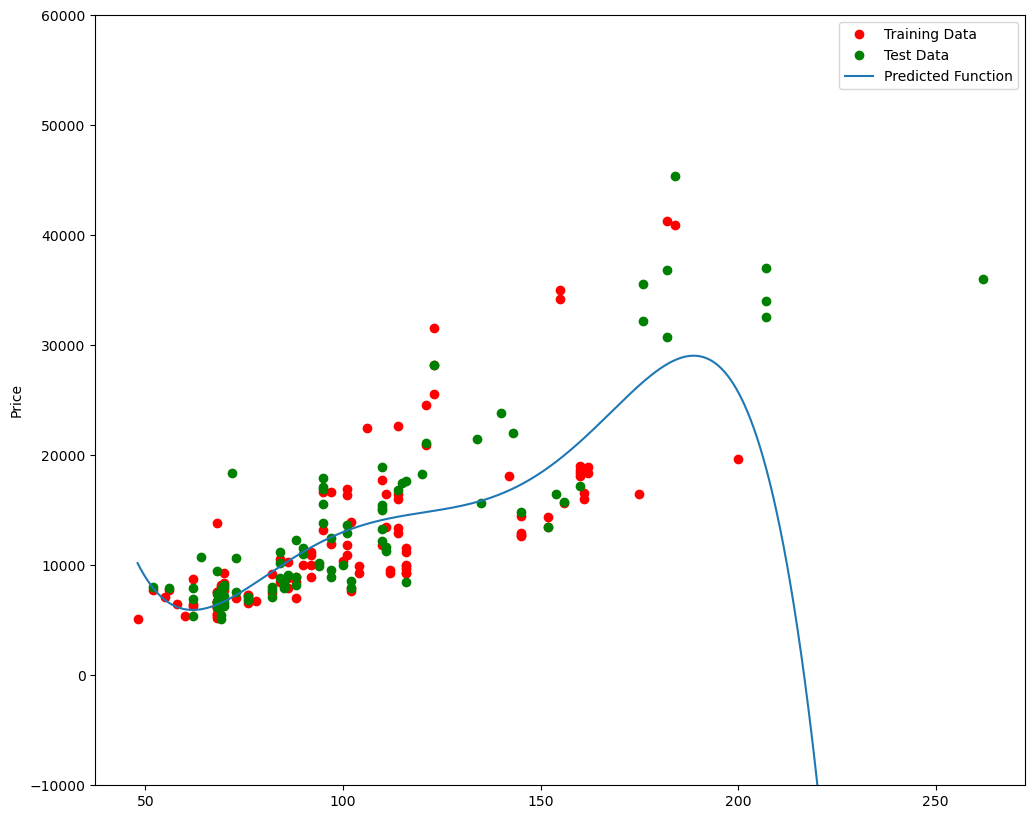

In [38]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data:


In [39]:
poly.score(x_train_pr, y_train)

0.5568527854053474

R^2 of the test data:


In [40]:
poly.score(x_test_pr, y_test)

-29.815481910638443

We see the R^2 for the training data is 0.5568 while the R^2 on the test data was -29.82.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

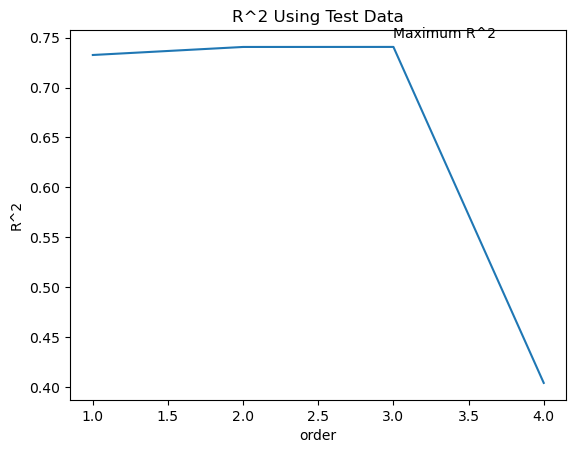

In [41]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


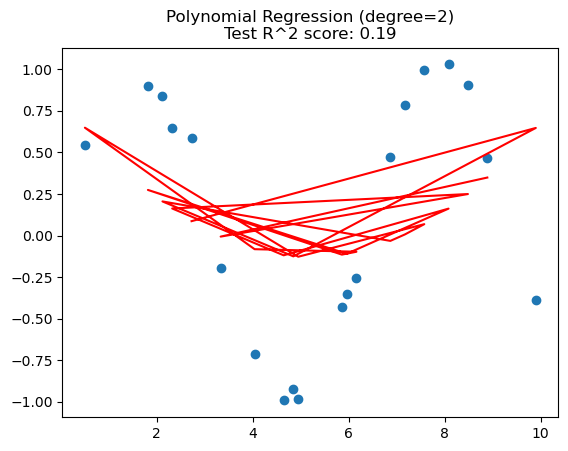

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=len(x))

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create polynomial features for training and test sets
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
X_test_poly = poly.transform(x_test.reshape(-1, 1))

# Fit linear regression model to training data
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict on test data and calculate R^2 score
y_pred = lin_reg.predict(X_test_poly)
r2_score = lin_reg.score(X_test_poly, y_test)

# Plot the test data and polynomial fit
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.title(f"Polynomial Regression (degree=2)\nTest R^2 score: {r2_score:.2f}")
plt.show()


In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Create polynomial features for training and test sets
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))

    # Fit linear regression model to training data
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    # Predict on test data and calculate R^2 score
    y_pred = lin_reg.predict(X_test_poly)
    r2_score = lin_reg.score(X_test_poly, y_test)

    # Plot the test data and polynomial fit
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, color='red')
    plt.title(f"Polynomial Regression (degree=2)\nTest R^2 score: {r2_score:.2f}")
    plt.show()


The following interface allows you to experiment with different polynomial orders and different amounts of data.


In [44]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [45]:
# Create a "PolynomialFeatures" object "pr1" of degree two
pr1=PolynomialFeatures(degree=2)

In [46]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [47]:
# How many dimensions does the new feature have?
x_train_pr1.shape #there are now 15 features

(160, 15)

In [48]:
# Create a linear regression model
#Train the object using the method "fit" using the polynomial features.
poly1=LinearRegression().fit(x_train_pr1,y_train)

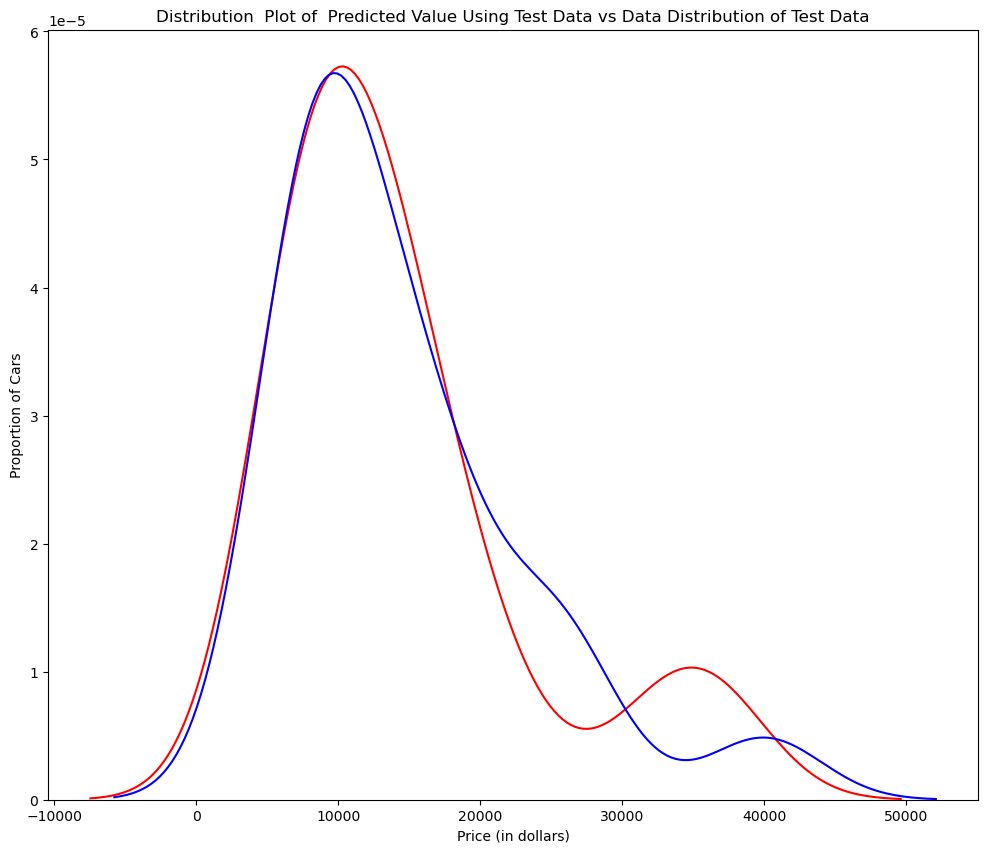

In [49]:
# predict an output on the polynomial features,
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

# display the distribution of the predicted test output vs. the actual test data.
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [50]:
# describe the two regions where the predicted prices are less accurate than the actual prices
print("predicted values:",yhat[0:4])
print("True values:",y_test[0:4].values)

predicted values: [ 6727.5684937   7306.69841686 12213.71328834 18895.0377327 ]
True values: [ 6295. 10698. 13860. 13499.]


The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to $ 40,000 range. As such the model is not as accurate in these ranges.

<h2 id="ref3">3. Ridge Regression</h2> 


here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.


In [51]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [52]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [53]:
RigeModel=Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [54]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

Similarly, you can obtain a prediction:


In [55]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:


In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6500.99471726  9598.44746202 24164.26903153 21704.33325008]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [57]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 136.54it/s, Test Score=0.763, Train Score=0.866]


We can plot out the value of R^2 for different alphas:


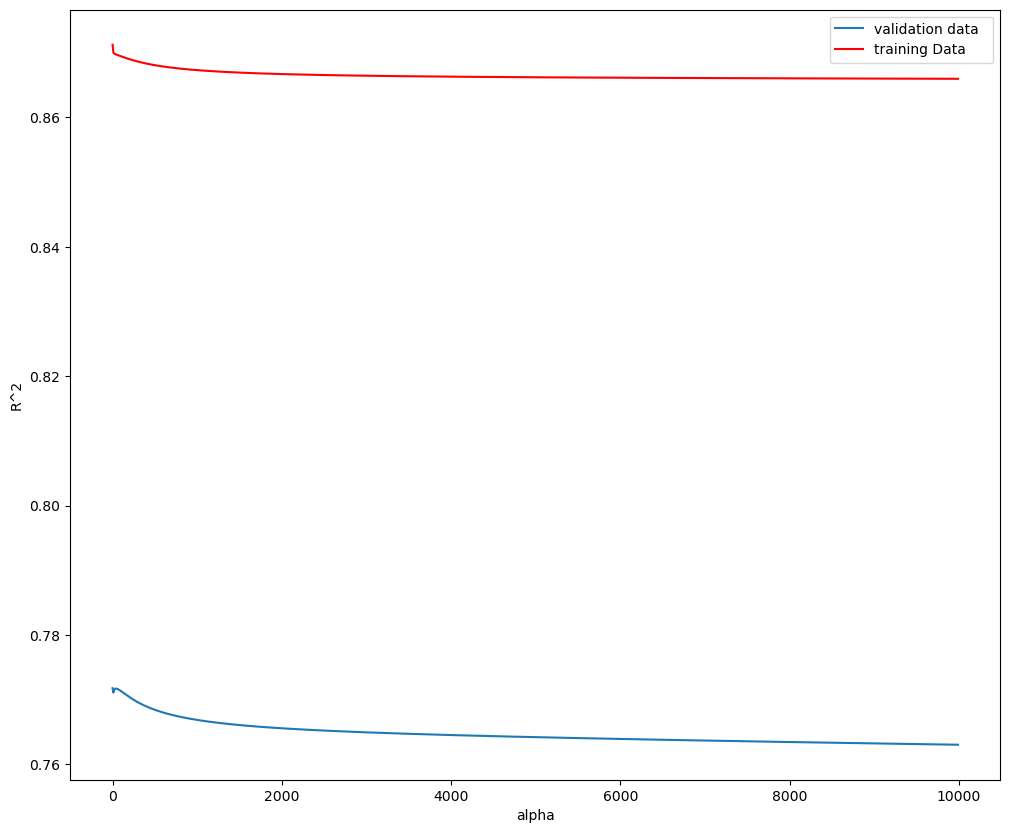

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


##### Perform Ridge regression.

In [59]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7710991480743407

<h2 id="ref4">4. Grid Search</h2>


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [60]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [61]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [62]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [63]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)


Fit the model:


In [64]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [65]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

We now test our model on the test data:


In [66]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8168026125772714